# Earthquake datasets
Decided to merge two separate earthquake datasets. It covers from year 2001 to 2023 from (https://www.kaggle.com/datasets/warcoder/earthquake-dataset).
    

## Imports

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


## Reading dataset

In [137]:
quakes = pd.read_csv('data/earthquake_data2001_2023.csv')
quakes.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


Some nan's are already present in the first five rows, but some can be filled later instead of dropping by taking it from the location column:

In [138]:
print(f"Rows: {quakes.shape[0]} | Features: {quakes.shape[1]}")
print(quakes.isna().sum())

Rows: 782 | Features: 19
title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64


## Descriptive statistics

In [139]:
quakes.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


## Dtypes

In [140]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

## Memory Usage

In [141]:
quakes.memory_usage(deep=True).sum()

467774

Lets transform float64 features as float16:

In [142]:
float64_cols = ['magnitude', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
quakes[float64_cols] = quakes[float64_cols].astype(np.float16)

In [143]:
quakes.memory_usage(deep=True).sum()

439622

Same for int64 featues:

In [144]:
int64_cols = ['cdi', 'mmi', 'tsunami', 'sig', 'nst']
quakes[int64_cols] = quakes[int64_cols].astype(np.int16)

In [145]:
quakes.memory_usage(deep=True).sum()

416162

Now let's transform object type columns into categories:

In [146]:
object_cols = list(quakes.select_dtypes('object').columns)
quakes[object_cols] = quakes[object_cols].astype('category')

In [147]:
quakes.memory_usage(deep=True).sum()

249001

Decrease in memory usage expressed in percentage:

In [148]:
start_mem = 467774
end_mem = 180712
pct_decrease = (start_mem - end_mem) / start_mem

print(f"Memory percentage decrease: {round(pct_decrease, 3)*100}%")

Memory percentage decrease: 61.4%


## Transform date_time column to datetime64 format

In [149]:
quakes['date_time'] = pd.to_datetime(quakes['date_time'])

In [150]:
quakes[pd.isnull(quakes).any(axis=1)].head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.898438,2022-11-18 13:37:00,4,4,green,0,735,us,99,2.228516,34.0,mww,25.0,-4.957031,100.750,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.000000,2022-12-11 07:09:00,3,3,green,1,755,us,147,3.125000,18.0,mww,579.0,-20.046875,-178.375,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.300781,2022-11-11 10:48:00,5,5,green,1,833,us,149,1.865234,21.0,mww,37.0,-19.296875,-172.125,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.601562,2022-09-11 10:14:00,0,2,green,1,670,us,131,4.996094,27.0,mww,624.5,-25.593750,178.250,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.000000,2022-09-11 09:51:00,4,3,green,1,755,us,142,4.578125,26.0,mwb,660.0,-26.046875,178.375,the Fiji Islands,NaN,NaN


If we want to fill this datapoint instead of dropping we can look for 6.6 magnitude earthquake data from 2022-09-11 10:14:00.

## Missing Values

In [151]:
quakes.isna().sum()/len(quakes)

title        0.000000
magnitude    0.000000
date_time    0.000000
cdi          0.000000
mmi          0.000000
alert        0.469309
tsunami      0.000000
sig          0.000000
net          0.000000
nst          0.000000
dmin         0.000000
gap          0.000000
magType      0.000000
depth        0.000000
latitude     0.000000
longitude    0.000000
location     0.006394
continent    0.736573
country      0.381074
dtype: float64

In [152]:
print(quakes.country.value_counts(ascending=False)[0:5])

Indonesia           110
Papua New Guinea     56
Chile                34
Vanuatu              27
Solomon Islands      22
Name: country, dtype: int64


In [153]:
print(quakes.country.value_counts(ascending=True)[0:5])

Venezuela                                       1
Algeria                                         1
Nicaragua                                       1
South Georgia and the South Sandwich Islands    1
Mozambique                                      1
Name: country, dtype: int64


In [154]:
print(f"Countries represented in dataset: {quakes.country.nunique()}")

Countries represented in dataset: 49


## EDA

/var/folders/l6/bs_245f50mv9cxj2n2ptrxdh0000gn/T/ipykernel_36835/2595497917.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(quakes.corr(), annot=True)


<AxesSubplot: title={'center': 'Correlation between numerical features'}>

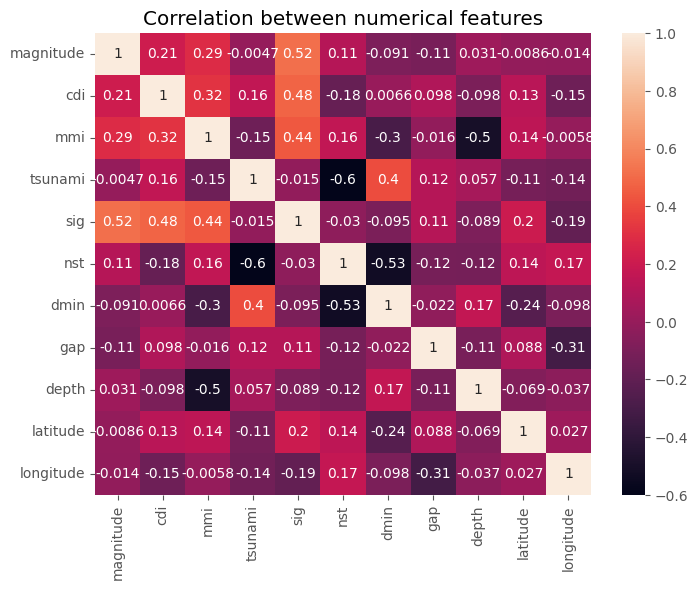

In [155]:
plt.figure(figsize=(8,6))
plt.title("Correlation between numerical features")
sns.heatmap(quakes.corr(), annot=True)

## Feature Understanding

In [156]:
quakes.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941406,4.333760,5.964194,0.388747,870.108696,230.250639,1.326172,25.046875,75.875000,3.539062,52.625000
std,0.445557,3.169939,1.462724,0.487778,322.465367,250.188177,2.218750,24.234375,inf,27.296875,117.875000
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.699219,-61.843750,-180.000000
25%,6.601562,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.626953,14.000000,-14.597656,-71.671875
50%,6.800781,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.296875,-2.572266,109.437500
75%,7.101562,7.000000,7.000000,1.000000,909.750000,445.000000,1.863281,30.000000,49.750000,24.660156,148.968750
max,9.101562,9.000000,9.000000,1.000000,2910.000000,934.000000,17.656250,239.000000,671.000000,71.625000,179.625000


We can already observe that the dataset is biased as it only includes earthquakes of magnitude 6.5 and higher!

NST: minimun is too low as it implies that no sismic stations determind earthquake locations. 


Sig: 0, 1000. We can see an anomaly as the max is 2910.

CDI: 0.0 - 10.0

GAP: 0.0 - 100.0. Anomaly as max is 239. 

### NST

Number of seismic stations which reported P- and S-arrival times for this earthquake. This number may be larger than the Number of Phases Used if arrival times are rejected because the distance to a seismic station exceeds the maximum allowable distance or because the arrival-time observation is inconsistent with the solution.

In [157]:
print("Earthquakes with NST == 0: ",quakes[quakes.nst == 0].shape[0])


Earthquakes with NST == 0:  365


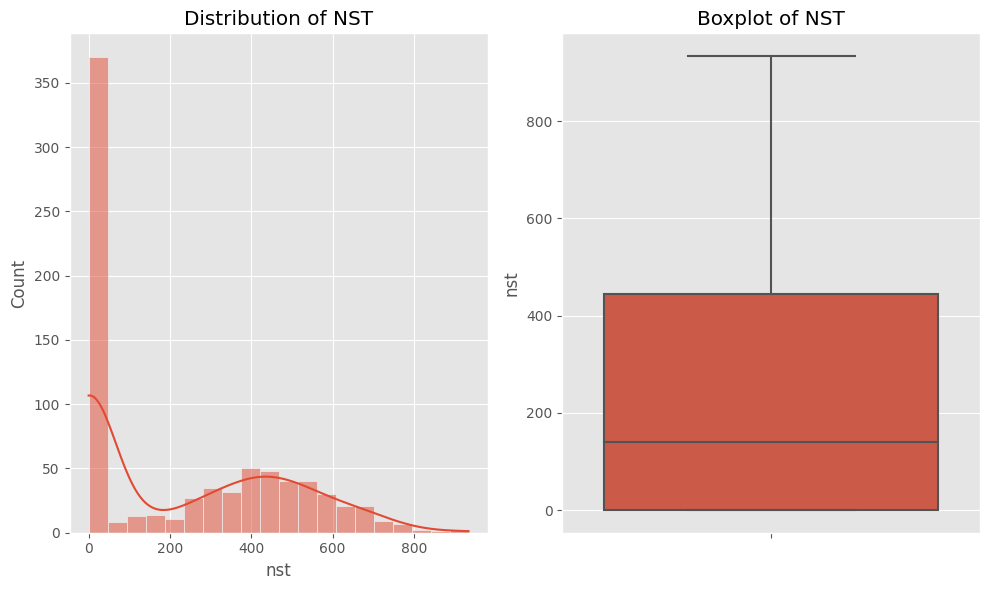

In [181]:
fig, axes = plt.subplots(ncols=2, figsize=(10,6))

sns.histplot(data=quakes, x='nst', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of NST')

sns.boxplot(data=quakes, y='nst', ax=axes[1])
axes[1].set_title('Boxplot of NST')

plt.tight_layout()

plt.show()

We might consider dropping datapoints equal to zero as it may mean less accurate data. Also, without that tail we would have a normal distribution. 

### MMI

Modified Mercalli Intensity estimates the shaking intensity from an earthquake at a specific location by considerings its effects on people, objects and buildings. High intensity above 6 MMI. The severity of the damage depends on the building type, the age of the building, and the quality of the construction. 

The maximum estimated instrumental intensity for the event. Computed by ShakeMap. While typically reported as a roman numeral, for the purposes of this API, intensity is expected as the decimal equivalent of the roman numeral. Learn more about magnitude vs. intensity.

Ranges from [0.0 - 10.0]

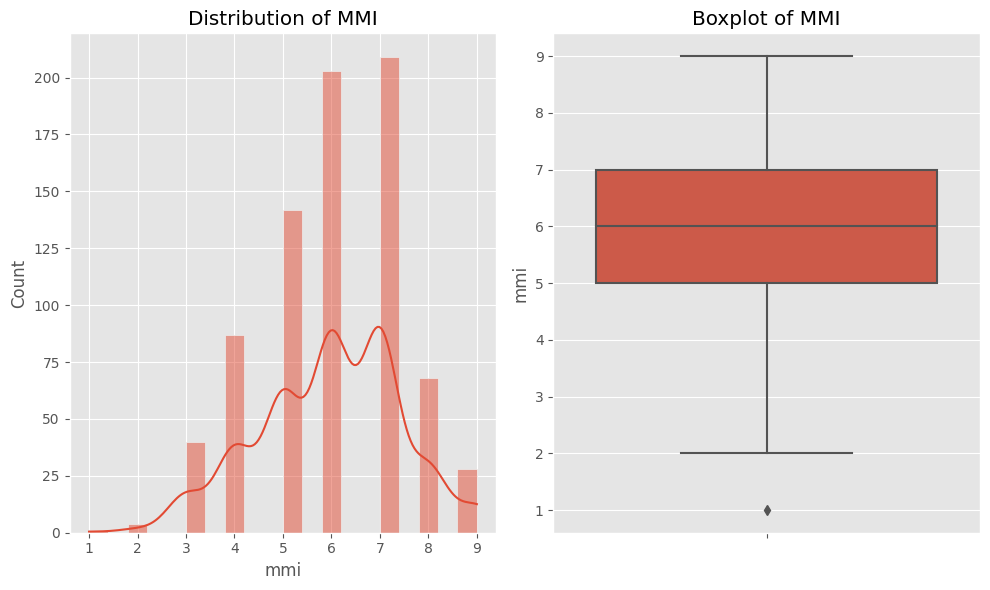

In [159]:
fig, axes = plt.subplots(ncols=2, figsize=(10,6))

sns.histplot(data=quakes, x='mmi', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of MMI')

sns.boxplot(data=quakes, y='mmi', ax=axes[1])
axes[1].set_title('Boxplot of MMI')

plt.tight_layout()

plt.show()

In [160]:
quakes[quakes.mmi < 2]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
160,M 6.5 - south of the Fiji Islands,6.5,2018-09-16 21:11:00,4,1,green,0,651,us,0,5.140625,18.0,mww,576.0,-25.421875,178.25,the Fiji Islands,NaN,NaN


This datapoint should not be removed as it happened at 576km of depth and there had a very low intensity.

Reference: https://www.volcanodiscovery.com/earthquakes/2018/09/16/21h11/magnitude6-SouthofFijiIslands-quake.html

What is the **mode**?

In [163]:
print("Mode of MMI: ",quakes.mmi.mode()[0])

Mode of MMI:  7


In [164]:
print("Median of MMI: ", quakes.mmi.median())

Median of MMI:  6.0


As we can see the most frequent mmi is very strong.

### Sig

A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact.

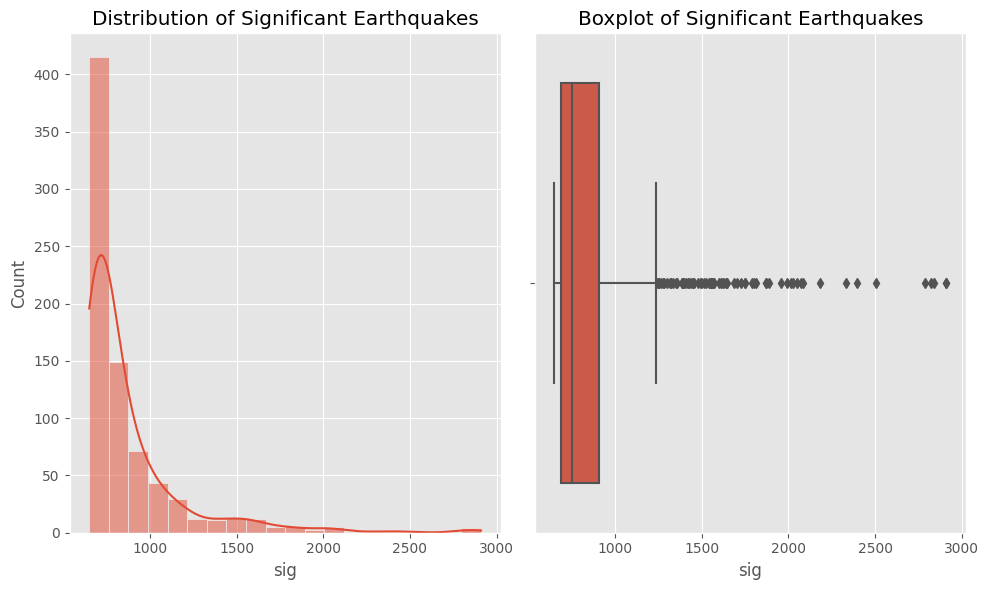

In [118]:
fig, axes = plt.subplots(ncols=2, figsize=(10,6))

sns.histplot(data=quakes, x='sig', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Significant Earthquakes')

sns.boxplot(data=quakes, x='sig', ax=axes[1])
axes[1].set_title('Boxplot of Significant Earthquakes')

plt.tight_layout()

plt.show()

In [120]:
quakes[quakes.sig > 1900]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
25,"M 7.3 - 57 km ENE of Namie, Japan",7.300781,2022-03-16 14:36:00,9,8,red,1,2397,us,0,2.935547,29.000000,mww,41.000000,37.687500,141.62500,"Namie, Japan",NaN,NaN
48,"M 7.0 - Acapulco, Mexico",7.000000,2021-08-09 01:47:00,8,8,red,1,2504,us,0,0.070007,43.000000,mww,20.000000,16.953125,-99.81250,"Acapulco, Mexico",North America,Mexico
53,"M 7.2 - Nippes, Haiti",7.199219,2021-08-14 12:29:00,9,8,red,1,2331,us,0,1.177734,23.000000,mww,10.000000,18.359375,-73.50000,"Nippes, Haiti",North America,Haiti
159,"M 7.5 - 72 km N of Palu, Indonesia",7.500000,2018-09-28 10:02:00,8,8,red,0,2026,us,0,1.649414,13.000000,mww,20.000000,-0.255859,119.87500,"Palu, Indonesia",NaN,Indonesia
190,"M 7.3 - 29 km S of ?alabja, Iraq",7.300781,2017-12-11 18:18:00,8,9,red,0,2790,us,0,0.283936,33.000000,mww,19.000000,34.906250,45.96875,"?alabja, Iraq",Asia,Iran
198,"M 8.2 - near the coast of Chiapas, Mexico",8.203125,2017-08-09 04:49:00,9,7,red,1,2910,us,0,0.943848,22.000000,mww,47.375000,15.023438,-93.87500,"Chiapas, Mexico",NaN,NaN
235,"M 6.6 - 5 km ESE of Preci, Italy",6.601562,2016-10-30 06:40:00,9,8,red,0,2840,us,0,0.173950,25.000000,mww,8.000000,42.875000,13.09375,"Preci, Italy",Europe,Italy
251,"M 7.0 - 6 km ESE of Kumamoto, Japan",7.000000,2016-04-15 16:25:00,9,9,red,1,2074,us,0,0.349121,32.000000,mww,10.000000,32.781250,130.75000,"Kumamoto, Japan",Asia,Japan
285,"M 8.3 - 48 km W of Illapel, Chile",8.296875,2015-09-16 22:54:00,9,8,orange,1,1960,us,0,0.684082,19.000000,mww,22.437500,-31.578125,-71.68750,"Illapel, Chile",NaN,Chile
308,"M 7.8 - 67 km NNE of Bharatpur, Nepal",7.800781,2015-04-25 06:11:00,8,9,red,0,2820,us,0,1.857422,12.000000,mww,8.218750,28.234375,84.75000,"Bharatpur, Nepal",Asia,Nepal


<AxesSubplot: xlabel='sig'>

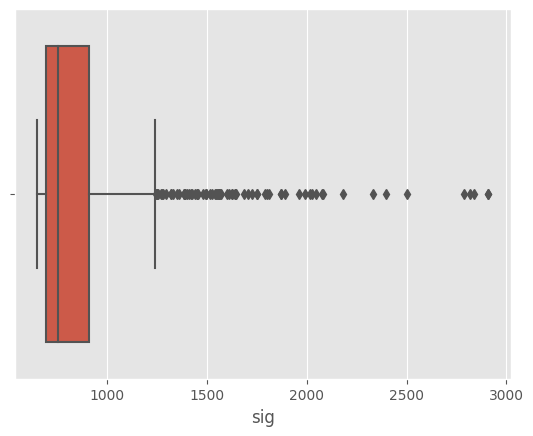

In [116]:
sns.boxplot(data=quakes, x='sig')

There are several earthquakes with very high Sig values. Above 600 is already considered strong so a value higher than 1500 would be too high.

### Net

<AxesSubplot: >

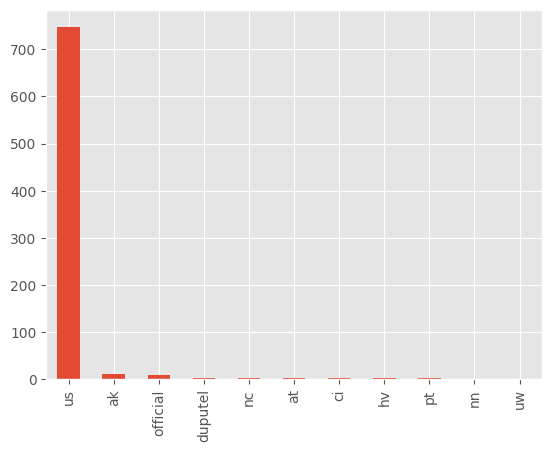

In [123]:
quakes['net'].value_counts().plot(kind='bar')

This column is very unbalanced and does not provide much information. Suggesting it could later be dropped.

### CDI

The maximum reported intensity for the event. 

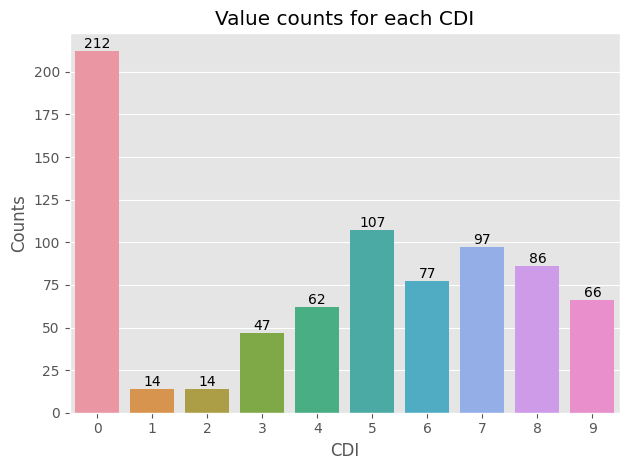

In [178]:


ax = sns.countplot(data=quakes, x='cdi')
ax.bar_label(ax.containers[0])
plt.title('Value counts for each CDI')
plt.xlabel('CDI')
plt.ylabel('Counts')
plt.tight_layout()

In [190]:
pd.DataFrame(quakes['cdi'].describe())

,cdi
count,782.000000
mean,4.333760
std,3.169939
min,0.000000
25%,0.000000
50%,5.000000
75%,7.000000
max,9.000000


Makes sense that there are many zeros as there are events in which people do not feel it. 

## Dmin

Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

In [192]:
quakes[quakes.nst == 0].head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
21,"M 6.6 - 55 km WSW of Masachapa, Nicaragua",6.601562,2022-04-21 07:42:00,6,5,green,1,762,us,0,0.914062,94.0,mww,27.0,11.554688,-87.000,"Masachapa, Nicaragua",NaN,NaN
22,M 7.0 - southeast of the Loyalty Islands,7.000000,2022-03-31 05:44:00,6,4,green,1,763,us,0,2.705078,26.0,mww,10.0,-22.578125,170.375,the Loyalty Islands,NaN,NaN
23,"M 6.9 - 284 km ESE of Tadine, New Caledonia",6.898438,2022-03-30 20:56:00,6,4,green,1,738,us,0,2.697266,42.0,mww,10.0,-22.718750,170.250,"Tadine, New Caledonia",NaN,NaN
24,"M 6.7 - 65 km S of Hualien City, Taiwan",6.699219,2022-03-22 17:41:00,8,7,green,1,806,us,0,0.289062,32.0,mww,24.0,23.343750,121.625,"Hualien City, Taiwan",Asia,Taiwan
25,"M 7.3 - 57 km ENE of Namie, Japan",7.300781,2022-03-16 14:36:00,9,8,red,1,2397,us,0,2.935547,29.0,mww,41.0,37.687500,141.625,"Namie, Japan",NaN,NaN


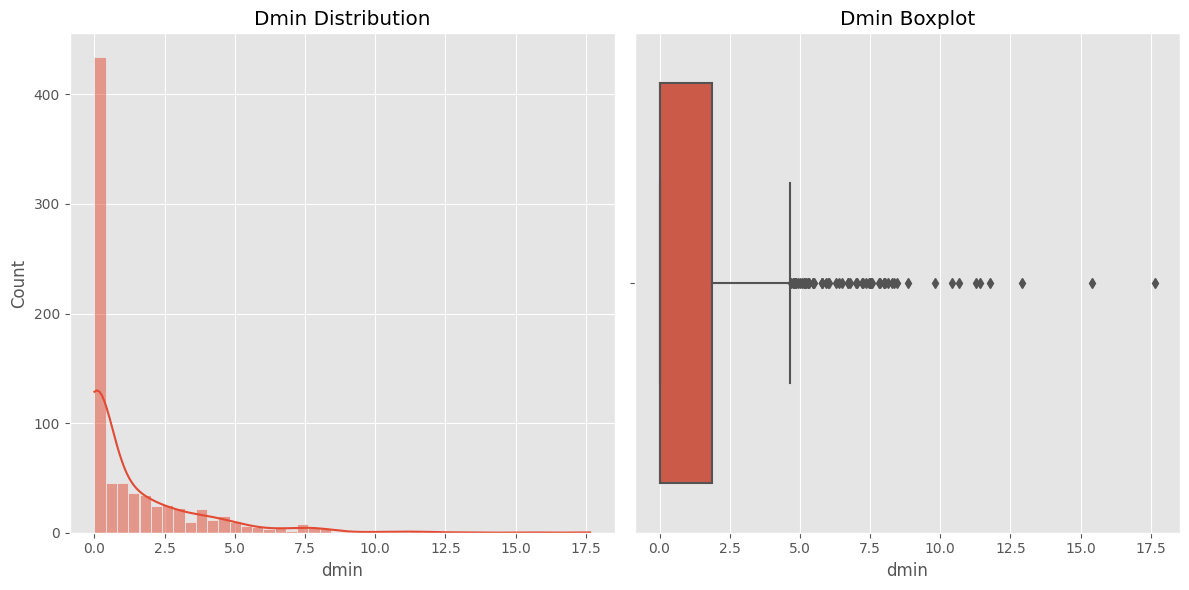

In [211]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(quakes.dmin, kde=True, ax=axes[0])
axes[0].set_title('Dmin Distribution')

sns.boxplot(data=quakes, x='dmin', ax=axes[1])
axes[1].set_title('Dmin Boxplot')

plt.tight_layout()